In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/final_sentiment.csv")

In [ ]:
df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,assigned_topic,topic_name,new_content,sentiment_label,sentiment_score,sentiment_label-bert,positive_probability,neutral_probability,negative_probability,compound_score_bert,finvader,finvader_label,flair_label
0,"Deal scene braces for change this year, blockb...",The promise of big returns that kept global ri...,The promise of big returns that kept global ri...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,04-01-2013,1,Financial Matters,promise big return keep global risk capital in...,NEGATIVE,0.110253,positive,0.061931,0.020231,0.917838,-0.855907,0.9573,positive,neutral
1,"A snapshopt of India’s private equity, venture...",ET presents a snapshopt of India’s private equ...,Risk capital investors spooked by the low ret...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,04-01-2013,1,Financial Matters,risk capital investor spook low return private...,NEGATIVE,0.999499,positive,0.097744,0.195582,0.706674,-0.608930,-0.8918,negative,positive
2,Cautious investment approach by private equity...,PE investors in the last one year have made sm...,Amid challenging business environment strategi...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 10:18 AM",Finance,04-01-2013,1,Financial Matters,amid challenge business environment strategic ...,NEGATIVE,0.958847,positive,0.092779,0.026845,0.880376,-0.787596,0.4914,positive,positive
3,TDS exempted on certain payments to reduce com...,The Revenue Department has exempted tax deduct...,NEW DELHI The Revenue Department has exempte...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 01:34 PM",Finance,04-01-2013,1,Financial Matters,delhi revenue department exempt tax deduction ...,NEGATIVE,-0.221869,positive,0.037014,0.103018,0.859968,-0.822954,0.0971,neutral,neutral
4,Gross direct tax collection up 8% in April-Dec...,The growth in net collection of wealth tax was...,NEW DELHI Led by healthy growth in personal i...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 02:05 PM",Finance,04-01-2013,1,Financial Matters,delhi lead healthy growth personal income tax ...,NEGATIVE,0.867618,positive,0.129739,0.104599,0.765663,-0.635924,0.9257,positive,positive


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['positive_probability', 'negative_probability', 'neutral_probability']] = scaler.fit_transform(
    df[['positive_probability', 'negative_probability', 'neutral_probability']]
)

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Use resampling to aggregate daily data into monthly averages
monthly_avg = df.resample('M').mean()

# Reset the index to have 'Date' as a column again

monthly_avg.head()

<ipython-input-23-984e8db85a7c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = df.resample('M').mean()


,assigned_topic,sentiment_score,positive_probability,neutral_probability,negative_probability,compound_score_bert,finvader
Date,,,,,,,
2013-01-31,1.0,0.416086,-0.215814,-0.042405,0.175598,-0.730302,0.502934
2013-02-28,1.0,0.542260,-0.116991,0.133097,-0.032155,-0.668443,0.482914
2013-03-31,1.0,0.519097,-0.112187,-0.023505,0.092473,-0.696040,0.506556
2013-04-30,1.0,0.634283,-0.149582,-0.035641,0.126807,-0.709389,0.473123
2013-05-31,1.0,0.414192,-0.055725,0.036364,0.006740,-0.668186,0.514121


In [ ]:
new_df = monthly_avg.resample('6M').mean()
new_df['Positive Probability (Rolling Mean)'] = new_df['positive_probability'].rolling(window=3).mean()
new_df['Negative Probability (Rolling Mean)'] = new_df['negative_probability'].rolling(window=3).mean()
new_df.head()

,assigned_topic,sentiment_score,positive_probability,neutral_probability,negative_probability,compound_score_bert,finvader,Positive Probability (Rolling Mean),Negative Probability (Rolling Mean)
Date,,,,,,,,,
2013-01-31,1.0,0.416086,-0.215814,-0.042405,0.175598,-0.730302,0.502934,NaN,NaN
2013-07-31,1.0,0.521155,-0.122038,0.017970,0.065071,-0.691278,0.488175,NaN,NaN
2014-01-31,1.0,0.472437,-0.015953,-0.023947,0.029960,-0.667558,0.525216,-0.117935,0.090210
2014-07-31,1.0,0.510562,0.018006,0.028344,-0.034889,-0.647787,0.511947,-0.039995,0.020047
2015-01-31,1.0,0.464037,0.017161,-0.022637,0.007257,-0.657487,0.510230,0.006405,0.000776


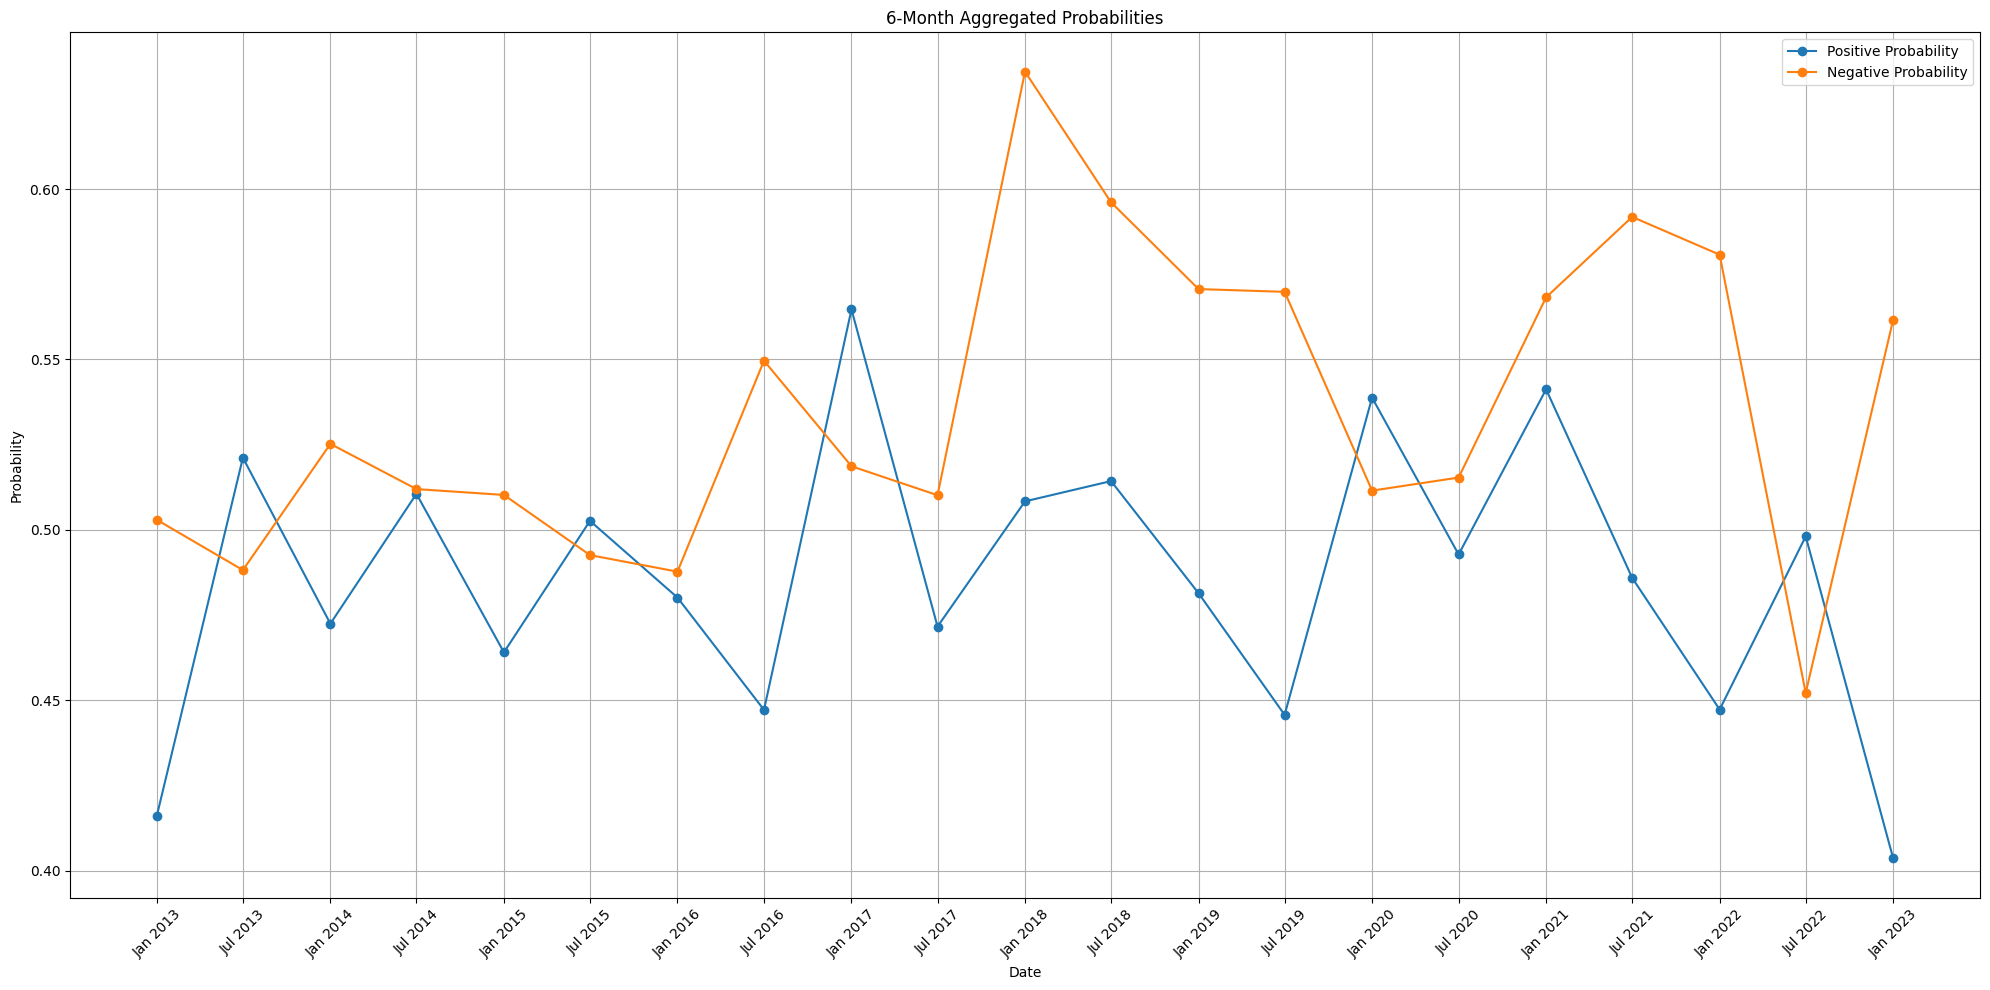

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 10))

# Plot positive and negative probabilities
ax.plot(new_df.index, new_df['sentiment_score'], label='Positive Probability', marker='o')
ax.plot(new_df.index, new_df['finvader'], label='Negative Probability', marker='o')

# # Format x-axis to display dates in "Jan 2023" format
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend()
ax.set_xticks(new_df.index)
ax.set_xticklabels([date.strftime('%b %Y') for date in new_df.index], rotation=45)
ax.grid(True)
# Show the plot
plt.title("6-Month Aggregated Probabilities")
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
label_encoder = LabelEncoder()
df['sentiment_label-bert'] = label_encoder.fit_transform(df['sentiment_label-bert'])

In [ ]:
# Split the data into training and testing based on the date
train_data_chunk = df[df['Date'] < '2020-04-01']
test_data_chunk = df[df['Date'] >= '2020-04-01']

# Define the features and labels
X_train = train_data_chunk['new_content']
y_train = train_data_chunk['sentiment_label-bert']
X_test = test_data_chunk['new_content']
y_test = test_data_chunk['sentiment_label-bert']

# Create a list of machine learning models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('tfidf', TfidfVectorizer()),  # You can customize TfidfVectorizer options
        ('model', model)
    ])

# Train and evaluate each model
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Print the results for each model
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

# Print the results for each model
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Metrics:
Accuracy: 0.8331
Precision: 0.8436
Recall: 0.8331
F1 Score: 0.8382
ROC-AUC: 0.5950

K-NN Metrics:
Accuracy: 0.8613
Precision: 0.8424
Recall: 0.8613
F1 Score: 0.8508
ROC-AUC: 0.7325

Logistic Regression Metrics:
Accuracy: 0.9078
Precision: 0.8892
Recall: 0.9078
F1 Score: 0.8815
ROC-AUC: 0.8976

Naive Bayes Metrics:
Accuracy: 0.8953
Precision: 0.8016
Recall: 0.8953
F1 Score: 0.8458
ROC-AUC: 0.7524

Random Forest Metrics:
Accuracy: 0.8987
Precision: 0.8582
Recall: 0.8987
F1 Score: 0.8547
ROC-AUC: 0.8579

SVM Metrics:
Accuracy: 0.8998
Precision: 0.8492
Recall: 0.8998
F1 Score: 0.8625
ROC-AUC: 0.8935

Decision Tree Metrics:
Accuracy: 0.8331
Precision: 0.8436
Recall: 0.8331
F1 Score: 0.8382
ROC-AUC: 0.5950

K-NN Metrics:
Accuracy: 0.8613
Precision: 0.8424
Recall: 0.8613
F1 Score: 0.8508
ROC-AUC: 0.7325

Logistic Regression Metrics:
Accuracy: 0.9078
Precision: 0.8892
Recall: 0.9078
F1 Score: 0.8815
ROC-AUC: 0.8976

Naive Bayes Metrics:
Accuracy: 0.8953
Precision: 0.8016

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


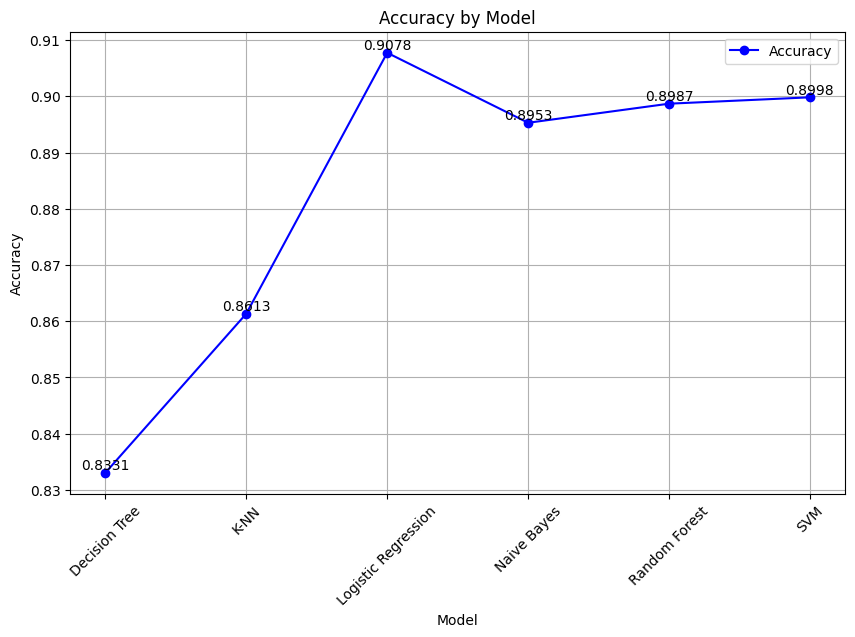

In [ ]:
import matplotlib.pyplot as plt

# Get the model names and accuracy values
model_names = list(results.keys())
accuracy_values = [result['Accuracy'] for result in results.values()]

# Create a line graph with data points
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)

# Show data points
for model, accuracy in zip(model_names, accuracy_values):
    plt.text(model, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.legend()
plt.show()


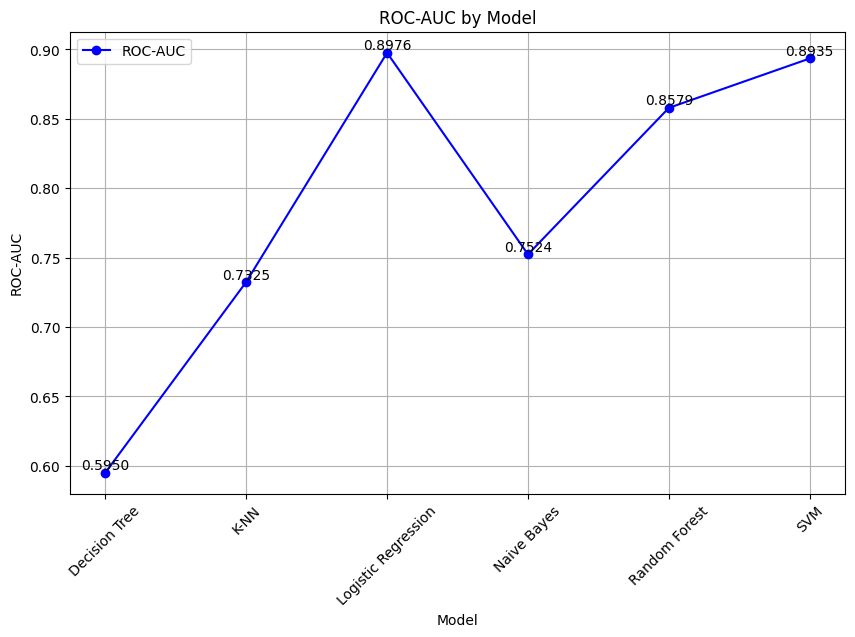

In [ ]:
import matplotlib.pyplot as plt

# Get the model names and ROC-AUC values
model_names = list(results.keys())
roc_auc_values = [result['ROC-AUC'] for result in results.values()]

# Create a line graph for ROC-AUC
plt.figure(figsize=(10, 6))
plt.plot(model_names, roc_auc_values, marker='o', linestyle='-', color='b', label='ROC-AUC')
plt.title('ROC-AUC by Model')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.grid(True)
plt.xticks(rotation=45)

# Show data points
for model, roc_auc in zip(model_names, roc_auc_values):
    plt.text(model, roc_auc, f'{roc_auc:.4f}', ha='center', va='bottom')

plt.legend()
plt.show()


In [ ]:
# Create a DataFrame to store the results
results_df = test_data_chunk.copy()

# Iterate through each model
for model_name, pipeline in pipelines.items():
    # Make predictions for the current model
    y_pred = pipeline.predict(X_test)

    # Store the predictions in a new column with the model's name
    results_df[model_name + '_Predicted'] = y_pred




In [ ]:
results_df.head()

,Unnamed: 0,Headline,Summary,Content,Category,Date_Time,type_cat,Date,assigned_topic,topic_name,...,compound_score_bert,finvader,finvader_label,flair_label,Decision Tree_Predicted,K-NN_Predicted,Logistic Regression_Predicted,Naive Bayes_Predicted,Random Forest_Predicted,SVM_Predicted
1677,1677,Global body seeks regulatory checks on crowdfu...,IOSCO has called for greater regulatory check...,NEW DELHI International Organisation of Securi...,"['Business News', 'News', 'Economy', 'Finance']","Feb 10, 2022, 09:19 AM",Finance,2022-02-10,1,Financial Matters,...,-0.912064,0.9462,positive,positive,2,2,2,2,2,2
5405,5405,Demonetisation: Currency recall could cost Ind...,The overall cost could be much higher. The dem...,NEW DELHI The cost of withdrawing highdenomina...,"['Business News', 'News', 'Economy', 'Finance']","Jun 03, 2022, 11:55 AM",Finance,2022-06-03,1,Financial Matters,...,-0.549142,-0.8438,negative,positive,2,2,2,2,2,2
6866,6866,Budget 2020 proposal for salaried professional...,Finance Ministry may allow tax exemptions of u...,The Centre is considering a proposal to extend...,"['Business News', 'News', 'Economy', 'Finance']","Dec 28, 2020, 04:14 AM",Finance,2020-12-28,1,Financial Matters,...,-0.766028,0.8153,positive,positive,2,2,2,2,2,2
6977,6977,Microfinance gets another blow amid coronaviru...,Poor are the most lucrative to lend in good ti...,Kolkata Investors rush to safety led to an ero...,"['Business News', 'News', 'Economy', 'Finance']","Apr 01, 2020, 02:47 AM",Finance,2020-04-01,1,Financial Matters,...,-0.872248,0.9356,positive,positive,2,2,2,2,2,2
6978,6978,Covid-19 battle: World Bank offers $1bn for pr...,The idea of the project will be to respond and...,Mumbai The World Bank has offered billion t...,"['Business News', 'News', 'Economy', 'Finance']","Apr 04, 2020, 07:38 AM",Finance,2020-04-04,1,Financial Matters,...,-0.542219,0.8936,positive,positive,2,2,2,2,2,2
